In [42]:
import sys, os
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

from functions import *

%reload_ext autoreload
%autoreload 2

In [65]:
# Fetch the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')

# Extract data (features) and target (labels)
X = mnist.data
y = mnist.target.astype(int)


X = X / 255.0


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

encoder = OneHotEncoder(sparse_output=False)
y_train_oh = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_oh  = encoder.transform(y_test.reshape(-1, 1))

Reg_nn = NeuralNetwork(X_train.shape[1], [32,10], [sigmoid,softmax], [derivate(sigmoid), derivate(softmax)], cross_entropy, cross_entropy_der)

In [72]:
for i in range(5):
    Reg_nn.train_SGD(X_train, y_train_oh, epochs=10, batch_size=1000)
    y_pred = Reg_nn._feed_forward(X_test)
    y_pred_label = np.argmax(y_pred, axis=1)
    accuracy = np.mean(y_test == y_pred_label)
    print(accuracy)


0.9437857142857143
0.9437142857142857
0.944
0.9435
0.9439285714285715


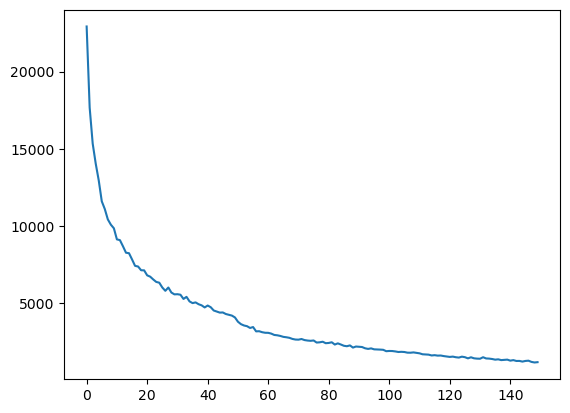

In [71]:
plt.plot(Reg_nn.get_info()["Cost_history"])